### 1. Import

In [1]:

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils.elpv_reader import load_dataset

### 2. Visualizing Data

In [2]:
images, proba, types = load_dataset()

In [3]:
types

array(['mono', 'mono', 'mono', ..., 'poly', 'poly', 'poly'], dtype='<U4')

In [4]:
images

array([[[14, 14, 14, ...,  9,  9,  9],
        [15, 15, 15, ..., 10,  9,  9],
        [15, 15, 16, ..., 10, 10, 10],
        ...,
        [29, 29, 29, ..., 19, 18,  4],
        [29, 29, 29, ..., 18, 18,  4],
        [29, 29, 29, ..., 18, 18,  4]],

       [[29, 29, 29, ..., 17, 16,  3],
        [29, 29, 29, ..., 17, 16,  3],
        [29, 29, 29, ..., 16, 15,  3],
        ...,
        [21, 22, 21, ..., 12, 12, 11],
        [20, 20, 20, ..., 12, 12, 11],
        [19, 19, 18, ..., 12, 12, 10]],

       [[29, 29, 30, ..., 19, 18,  4],
        [29, 30, 30, ..., 19, 18,  4],
        [30, 30, 31, ..., 18, 18,  3],
        ...,
        [35, 35, 35, ..., 21, 12,  0],
        [35, 35, 35, ..., 21, 12,  0],
        [35, 35, 35, ..., 21, 12,  0]],

       ...,

       [[66, 65, 62, ..., 62, 62, 62],
        [64, 62, 61, ..., 60, 60, 61],
        [63, 61, 59, ..., 61, 60, 60],
        ...,
        [45, 50, 55, ..., 57, 51, 47],
        [45, 47, 48, ..., 52, 49, 46],
        [43, 43, 44, ..., 48, 46

In [5]:
images[0]

array([[14, 14, 14, ...,  9,  9,  9],
       [15, 15, 15, ..., 10,  9,  9],
       [15, 15, 16, ..., 10, 10, 10],
       ...,
       [29, 29, 29, ..., 19, 18,  4],
       [29, 29, 29, ..., 18, 18,  4],
       [29, 29, 29, ..., 18, 18,  4]], dtype=uint8)

In [6]:
images[0].shape

(300, 300)

In [7]:
proba_df = pd.DataFrame(data=proba, columns = ["P"])

In [8]:
proba_df.head(10)

,P
0,1.0
1,1.0
2,1.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


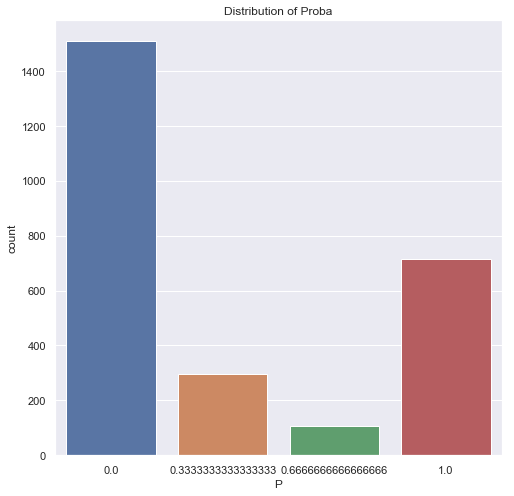

In [9]:
import seaborn as sns; sns.set()


plt.figure(figsize=(8, 8))
sns.countplot(x = "P", data = proba_df)
plt.title("Distribution of Proba")
plt.show()

In [10]:
#images_df = pd.DataFrame(data=images)
types_df = pd.DataFrame(data = types, columns = ["Types"])

In [11]:
types_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 1 columns):
Types    2624 non-null object
dtypes: object(1)
memory usage: 20.6+ KB


In [12]:
proba_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 1 columns):
P    2624 non-null float64
dtypes: float64(1)
memory usage: 20.6 KB


In [13]:
(proba_df.isnull()).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 1 columns):
P    2624 non-null bool
dtypes: bool(1)
memory usage: 2.6 KB


In [14]:
test_df = pd.concat([types_df["Types"], proba_df], axis = 1)

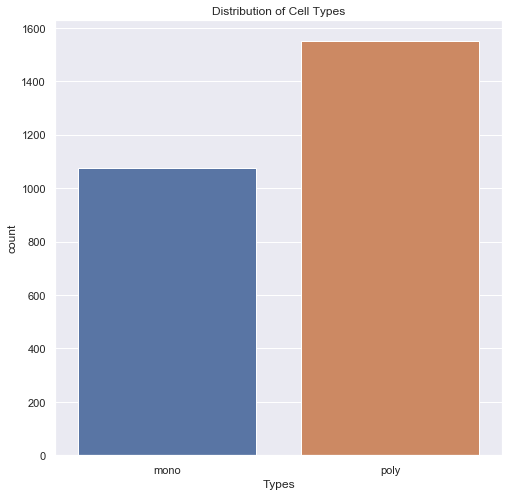

In [15]:
plt.figure(figsize=(8, 8))
sns.countplot(x = "Types", data = test_df)
plt.title("Distribution of Cell Types")
plt.show()

### 3. Feature Detection

In [16]:
import cv2

In [86]:
img = cv2.imread("cell0377.jpg", -1)

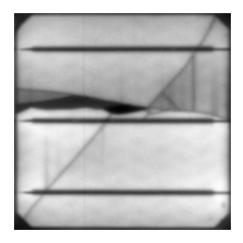

In [87]:
#cmap = 'gray', interpolation = 'bicubic'
plt.imshow(img, cmap= 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [23]:
# SIFT ATTEMPT
# ** PATENTED ** #

# opencv-python==3.4.2.16 or <

#img_gray = img

#sift = cv2.xfeatures2d.SIFT_create()
#kp = sift.detect(gray,None)

#img=cv2.drawKeypoints(gray,kp,img_gray)
#cv2.imwrite('cell0001_sift_keypoints.jpg',img_gray)

In [25]:
# SURF ATTTEMPT
# ** PATENTED ** #

# opencv-python==3.4.2.16 or <

#img_gray_0001 = cv2.imread("images/cell0001.png", 0) # 0 dictates channels read as grayscale
# Create SURF object.
# Set Hessian Threshold to 400
#surf = cv2.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
#kp, des = surf.detectAndCompute(img_gray_0001,None)
#len(kp)

In [94]:
# FAST ATTEMPT


img = cv2.imread('clahe_2.jpg',0)
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv2.imwrite('fast_true.png',img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img,None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv2.drawKeypoints(img, kp, None, color=(255,0,0))
cv2.imwrite('fast_false.png',img3)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 159
Total Keypoints without nonmaxSuppression: 836


True

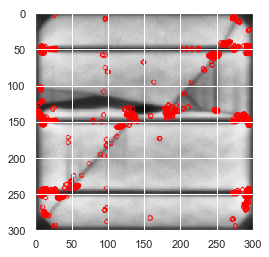

In [95]:
img_fast = cv2.imread("fast_false.png", -1)

plt.imshow(img_fast)
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

Shows only on Keypoints, why is this?

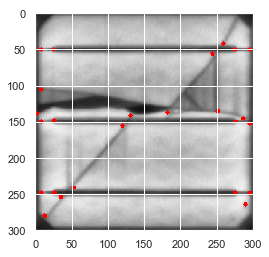

(<matplotlib.image.AxesImage at 0x137216438>, None)

In [88]:
# Corner Detection (SHI-TOMASI)


img_0001 = cv2.imread('clahe_2.jpg')
gray = cv2.cvtColor(img_0001,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = np.int0(corners)
for i in corners:
    x,y = i.ravel()
    cv2.circle(img_0001,(x,y),3,255,-1)
plt.imshow(img_0001),plt.show()

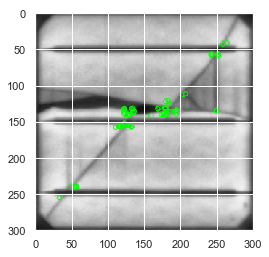

(<matplotlib.image.AxesImage at 0x137524630>, None)

In [89]:
# ORB ATTEMPT

img = cv2.imread('clahe_2.jpg',0)

# Initiate ORB detector
orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2), plt.show()

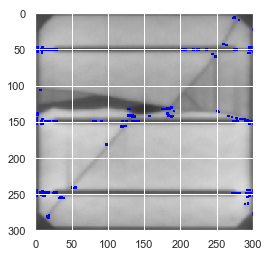

(<matplotlib.image.AxesImage at 0x1370ba048>, None)

In [77]:
# HARRIS Corner Detection


# No Mapping
img = cv2.imread('cell0377.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img), plt.show()

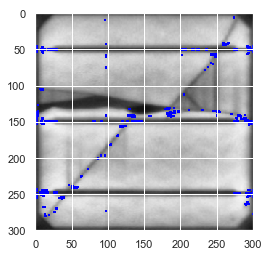

(<matplotlib.image.AxesImage at 0x11c3ea400>, None)

In [78]:
# HARRIS Corner Detection

# Histograms Equalization 
img = cv2.imread('clahe_2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img), plt.show()


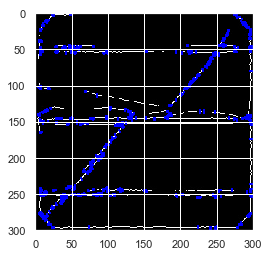

(<matplotlib.image.AxesImage at 0x137295940>, None)

In [81]:
# HARRIS Corner Detection

# Canny Edge Detection Map 
img = cv2.imread('edge.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img), plt.show()

In [75]:
# Hough Line Transformation

img = cv2.imread('clahe_2.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 5
maxLineGap = 50
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)

True

In [74]:
# Histograms Equalization
# Balancing contrast in B&W images


img = cv2.imread('images/cell0377.png',0)
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
cv2.imwrite('clahe_2.jpg',cl1)


True

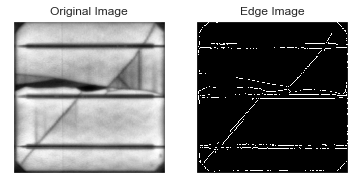

True

In [80]:
# CANNY EDGE DETECTION

img = cv2.imread('clahe_2.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('edge.jpg', edges)

In [91]:
# Histogram of Oriented Gradients (HOG)

# returns 4 vectors of 16 values, 64 values total
bin_n = 16

def hog(img):
    gx = cv2.Sobel(img, cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(img, cv2.CV_32F, 0, 1)
    mag, ang = cv2.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist


img = cv2.imread('clahe_2.jpg',0)
hog(img)

array([6.61980391e+01, 4.42367558e+01, 1.17625526e+02, 6.33718343e+01,
       3.99103696e+02, 2.27845140e+02, 2.14951900e+02, 8.89893765e+01,
       6.61374249e+01, 0.00000000e+00, 1.14017534e+01, 0.00000000e+00,
       0.00000000e+00, 7.61577368e+00, 0.00000000e+00, 1.85422192e+01,
       8.32495686e+04, 1.01391935e+04, 6.64266416e+03, 1.16755303e+03,
       2.14813954e+03, 5.19276393e+02, 1.16333602e+03, 6.04690877e+03,
       7.76741256e+03, 1.16735708e+03, 1.37084521e+03, 1.38115819e+03,
       4.47437461e+03, 4.16261681e+03, 7.59457438e+03, 1.00160370e+05,
       9.80382163e+02, 6.13875335e+02, 9.03248767e+03, 9.93946841e+04,
       1.09717330e+05, 6.87449567e+03, 1.69403564e+03, 9.45466271e+02,
       1.31076842e+03, 1.12698122e+02, 6.87640138e+01, 5.47671719e+01,
       1.20440793e+02, 1.44706896e+02, 1.62751524e+01, 2.28824568e+01,
       1.00913324e+05, 1.17486245e+05, 1.20343875e+05, 6.28854438e+05,
       7.39188563e+05, 9.04264122e+04, 6.60370987e+04, 1.64836047e+05,
      

### 4. SVM

In [ ]:
img = cv.imread('digits.png',0)
if img is None:
    raise Exception("we need the digits.png image from samples/data here !")
cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]
# First half is trainData, remaining is testData
train_cells = [ i[:50] for i in cells ]
test_cells = [ i[50:] for i in cells]
deskewed = [list(map(deskew,row)) for row in train_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
trainData = np.float32(hogdata).reshape(-1,64)
responses = np.repeat(np.arange(10),250)[:,np.newaxis]
svm = cv.ml.SVM_create()
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setType(cv.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)
svm.train(trainData, cv.ml.ROW_SAMPLE, responses)
svm.save('svm_data.dat')
deskewed = [list(map(deskew,row)) for row in test_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
testData = np.float32(hogdata).reshape(-1,bin_n*4)
result = svm.predict(testData)[1]
mask = result==responses
correct = np.count_nonzero(mask)
print(correct*100.0/result.size)